<a href="https://colab.research.google.com/github/Esmreety/Tomato-Disease-Detection/blob/main/Tomato_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/Copy of segmented2.zip'

In [ ]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pickle
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

img_size=224

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    # rotation_range=30,
    data_format='channels_last',
    # vertical_flip=True,
    # brightness_range=[0.5, 1.5],
    validation_split =0.2,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
'/content/segmented2/train',
target_size=(img_size,img_size),
batch_size=16,
color_mode = 'rgb',
shuffle = True,
seed = 42,
class_mode='categorical',
subset = 'training'
)


valid_generator = train_datagen.flow_from_directory(
directory="/content/segmented2/train",
target_size=(img_size, img_size),
color_mode="rgb",
batch_size=16,
class_mode="categorical",
shuffle=True,
seed=42,
subset ='validation'

)

Found 13285 images belonging to 10 classes.
Found 3317 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    # horizontal_flip=True,
    # zoom_range=[0.5, 1.25],
    rescale=1./255, 
   
 )
test_generator = test_datagen.flow_from_directory(
    directory="/content/segmented2/test",
    target_size=(img_size, img_size),
    color_mode="rgb",
    batch_size=1,
    class_mode='binary',
    shuffle=False,
    seed=42
    )

Found 995 images belonging to 10 classes.


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv3D,Conv2D,MaxPooling2D,Input,Dense,Flatten,Dropout,Activation,BatchNormalization,GlobalAveragePooling2D
from tensorflow.python.keras.layers import PReLU
from tensorflow.python.keras import losses
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.layers import LeakyReLU, PReLU
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50






base_model1=tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights="imagenet",
    classes=1000)


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model1.trainable = False

In [ ]:

def createmodel():
  model = Sequential()
  #input_shape=(img_size,img_size,3)
  #model.build(input_shape)
  model.add(base_model1) #loads above imported pretrained model
  #     #  here we added new layers
  model.add(GlobalAveragePooling2D())
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  #model.add(Dropout(0.05))
  model.add(Dense(10, activation='softmax', name ='output'))
  
  opt = RMSprop(learning_rate=0.0001,decay=(1e-3)/1000)
  #opt=Adam(learning_rate=0.0001)
  model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
  #model.summary()
  return model

In [ ]:

model=createmodel()

In [ ]:
history=model.fit_generator(
        train_generator,
        epochs=20,
        validation_data=valid_generator,
        validation_steps=20
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
831/831 [==============================] - 62s 60ms/step - loss: 0.8255 - accuracy: 0.7313 - val_loss: 0.4377 - val_accuracy: 0.8656
Epoch 2/20
831/831 [==============================] - 49s 59ms/step - loss: 0.4445 - accuracy: 0.8540 - val_loss: 0.4336 - val_accuracy: 0.8344
Epoch 3/20
831/831 [==============================] - 49s 59ms/step - loss: 0.3536 - accuracy: 0.8826 - val_loss: 0.3996 - val_accuracy: 0.8594
Epoch 4/20
831/831 [==============================] - 48s 58ms/step - loss: 0.2966 - accuracy: 0.9034 - val_loss: 0.4186 - val_accuracy: 0.8781
Epoch 5/20
831/831 [==============================] - 48s 58ms/step - loss: 0.2572 - accuracy: 0.9166 - val_loss: 0.2838 - val_accuracy: 0.9094
Epoch 6/20
831/831 [==============================] - 48s 57ms/step - loss: 0.2243 - accuracy: 0.9265 - val_loss: 0.3141 - val_accuracy: 0.8813
Epoch 7/20
831/831 [==============================] - 48s 57ms/step - loss: 0.1988 - accuracy: 0.9390 - val_loss: 0.2713 - val_accuracy:

In [ ]:
model.save("MobilenetV2.hdf5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/MobilenetV2.hdf5')

prediction=model.predict(test_generator,verbose=1)
print(prediction)

995/995 [==============================] - 14s 13ms/step
[[9.9996984e-01 6.3951784e-06 2.6718050e-07 ... 4.9463370e-06
  1.1513478e-17 1.4961699e-08]
 [9.9998522e-01 7.4903408e-09 1.0931642e-06 ... 1.2467579e-05
  7.7434755e-19 1.1045394e-06]
 [9.9999797e-01 1.8816919e-06 2.1932747e-09 ... 1.4597573e-09
  1.9932617e-21 4.6797654e-17]
 ...
 [1.7610455e-07 4.0465860e-08 9.4331050e-08 ... 5.7282068e-07
  1.0048020e-11 9.9999905e-01]
 [2.4871118e-13 6.3097948e-05 1.6345342e-07 ... 2.0382771e-07
  2.1051573e-04 9.9960130e-01]
 [1.3075722e-14 3.4075731e-07 1.1679121e-09 ... 1.0291809e-11
  4.9294146e-16 9.9981147e-01]]


In [ ]:
yp=np.argmax(prediction,axis=1)
print(yp)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 6 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 1 2 1
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 7 2 2 4 2 2 2 2 2 2 2 2 6 2 2 2 1 1 2 2 2
 2 1 2 2 4 2 2 2 3 2 2 2 2 2 2 2 1 2 2 2 2 2 2 8 2 2 2 2 2 2 2 2 2 2 3 7 3
 3 3 3 3 9 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 2 3 3 3 3 4 3
 3 2 3 3 3 1 3 3 3 3 3 3 3 3 4 3 3 3 1 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 4 4 4 4 1 4 4 4 4 1 1 1
 1 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 3 4 4 4 4 4
 4 4 1 4 4 4 4 4 4 4 4 4 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')

target_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
print(classification_report(test_generator.classes, yp, target_names=target_names))

Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.91      0.94       100
                        Tomato___Early_blight       0.76      0.96      0.85       100
                         Tomato___Late_blight       0.94      0.81      0.87        95
                           Tomato___Leaf_Mold       0.95      0.88      0.91       100
                  Tomato___Septoria_leaf_spot       0.87      0.89      0.88       100
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.90      0.91       100
                         Tomato___Target_Spot       0.91      0.85      0.88       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.97      0.97       100
                 Tomato___Tomato_mosaic_virus       0.97      0.99      0.98       100
                             Tomato___healthy       0.94      0.98      0.96       100

                   

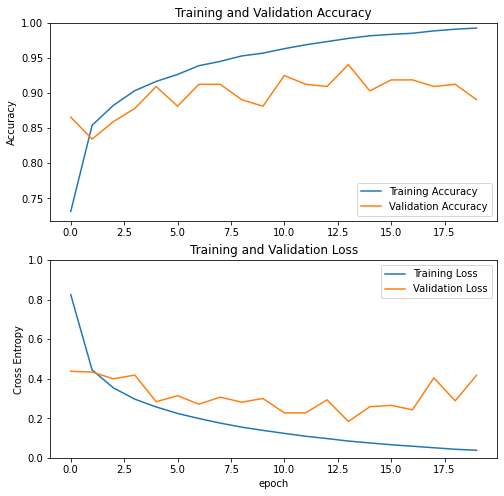

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

print("Total number of layers in the model is ", len(base_model1.layers))

Total number of layers in the model is  154


In [ ]:
# Unfreeze some of the top(output-ish) layers of the base model
# For this, first unfreeze the whole model
base_model1.trainable = True

# Let's fine tune after the 100th layer onwards
fine_tune_at = 100

# Now freeze all layers near the input till 100
for layer in base_model1.layers[:fine_tune_at]:
    layer.trainable = False

# Now out of the 150 layers, the the last(output-ish) 55 layers can be fine tuned

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

model.fit_generator(generator=train_generator, 
                    epochs=5, 
                    validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
831/831 [==============================] - 61s 70ms/step - loss: 0.0224 - accuracy: 0.9980 - val_loss: 0.2464 - val_accuracy: 0.9210
Epoch 2/5
831/831 [==============================] - 57s 68ms/step - loss: 0.0208 - accuracy: 0.9980 - val_loss: 0.2444 - val_accuracy: 0.9237
Epoch 3/5
831/831 [==============================] - 56s 67ms/step - loss: 0.0199 - accuracy: 0.9980 - val_loss: 0.2485 - val_accuracy: 0.9207
Epoch 4/5
831/831 [==============================] - 56s 67ms/step - loss: 0.0195 - accuracy: 0.9983 - val_loss: 0.2452 - val_accuracy: 0.9228
Epoch 5/5
831/831 [==============================] - 56s 67ms/step - loss: 0.0192 - accuracy: 0.9980 - val_loss: 0.2441 - val_accuracy: 0.9246


In [ ]:
model.save("MobilenetV2a.hdf5") #fine tuned model

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/MobilenetV2a.hdf5')

prediction=model.predict(test_generator,verbose=1)
print(prediction)

995/995 [==============================] - 14s 13ms/step
[[9.99975085e-01 9.86683403e-07 1.17270929e-06 ... 2.50732592e-06
  2.06148608e-18 4.64082550e-09]
 [9.99984622e-01 7.58212548e-10 5.02070270e-06 ... 9.61550450e-06
  1.71276095e-19 6.15684883e-07]
 [9.99999642e-01 1.57730085e-07 4.00387723e-09 ... 5.75544890e-10
  2.47749833e-22 9.02782687e-18]
 ...
 [1.11335638e-07 7.09551795e-09 2.81729029e-07 ... 5.02384808e-07
  6.29272502e-12 9.99999046e-01]
 [1.70503436e-13 9.18169826e-06 3.05436117e-07 ... 2.49314411e-07
  1.55409842e-04 9.99694586e-01]
 [1.16442483e-14 1.33371614e-07 4.33474945e-09 ... 1.42914725e-11
  2.57180379e-16 9.99882936e-01]]


In [ ]:
yp=np.argmax(prediction,axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report')

target_names = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
print(classification_report(test_generator.classes, yp, target_names=target_names))

Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.94      0.94       100
                        Tomato___Early_blight       0.84      0.89      0.86       100
                         Tomato___Late_blight       0.85      0.85      0.85        95
                           Tomato___Leaf_Mold       0.95      0.89      0.92       100
                  Tomato___Septoria_leaf_spot       0.87      0.90      0.88       100
Tomato___Spider_mites Two-spotted_spider_mite       0.94      0.91      0.92       100
                         Tomato___Target_Spot       0.89      0.89      0.89       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.96      0.97       100
                 Tomato___Tomato_mosaic_virus       0.97      0.98      0.98       100
                             Tomato___healthy       0.96      0.97      0.97       100

                   